In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Acquire

In [2]:
# Read the red and white wine DataFrames
red_df = pd.read_csv('https://query.data.world/s/km3v7y3hbhnq6q3qxmgunsty22chem?dws=00000')
white_df = pd.read_csv('https://query.data.world/s/tzchvcxc66f2wiye4k3x3agz2vthyu?dws=00000')

In [3]:
# Add a 'wine_type' column to each DataFrame
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

In [4]:
# Combine the DataFrames into one
df = pd.concat([red_df, white_df], ignore_index=True)
df.shape


(6497, 13)

In [5]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality wine_type  
0         8.8        6       red  
1         9.5        6       red  
2        10.1        6       red  
3         9.9        6       red  
4         9.9        6       red  
...       ...      ...       ...  
6492     10.5        5     white  
6493     11.2        6     white  
6494     11.0        6     white  
6495     10.2        5     white  
6496     11.0        6     white  

[6497 rows x 13 columns]

# Explore

In [6]:
# clean up the column names:
df.columns = [
    col.lower().replace(' ','_') for col in df.columns
]

In [7]:
# Data stats show no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Pairplot for relationship

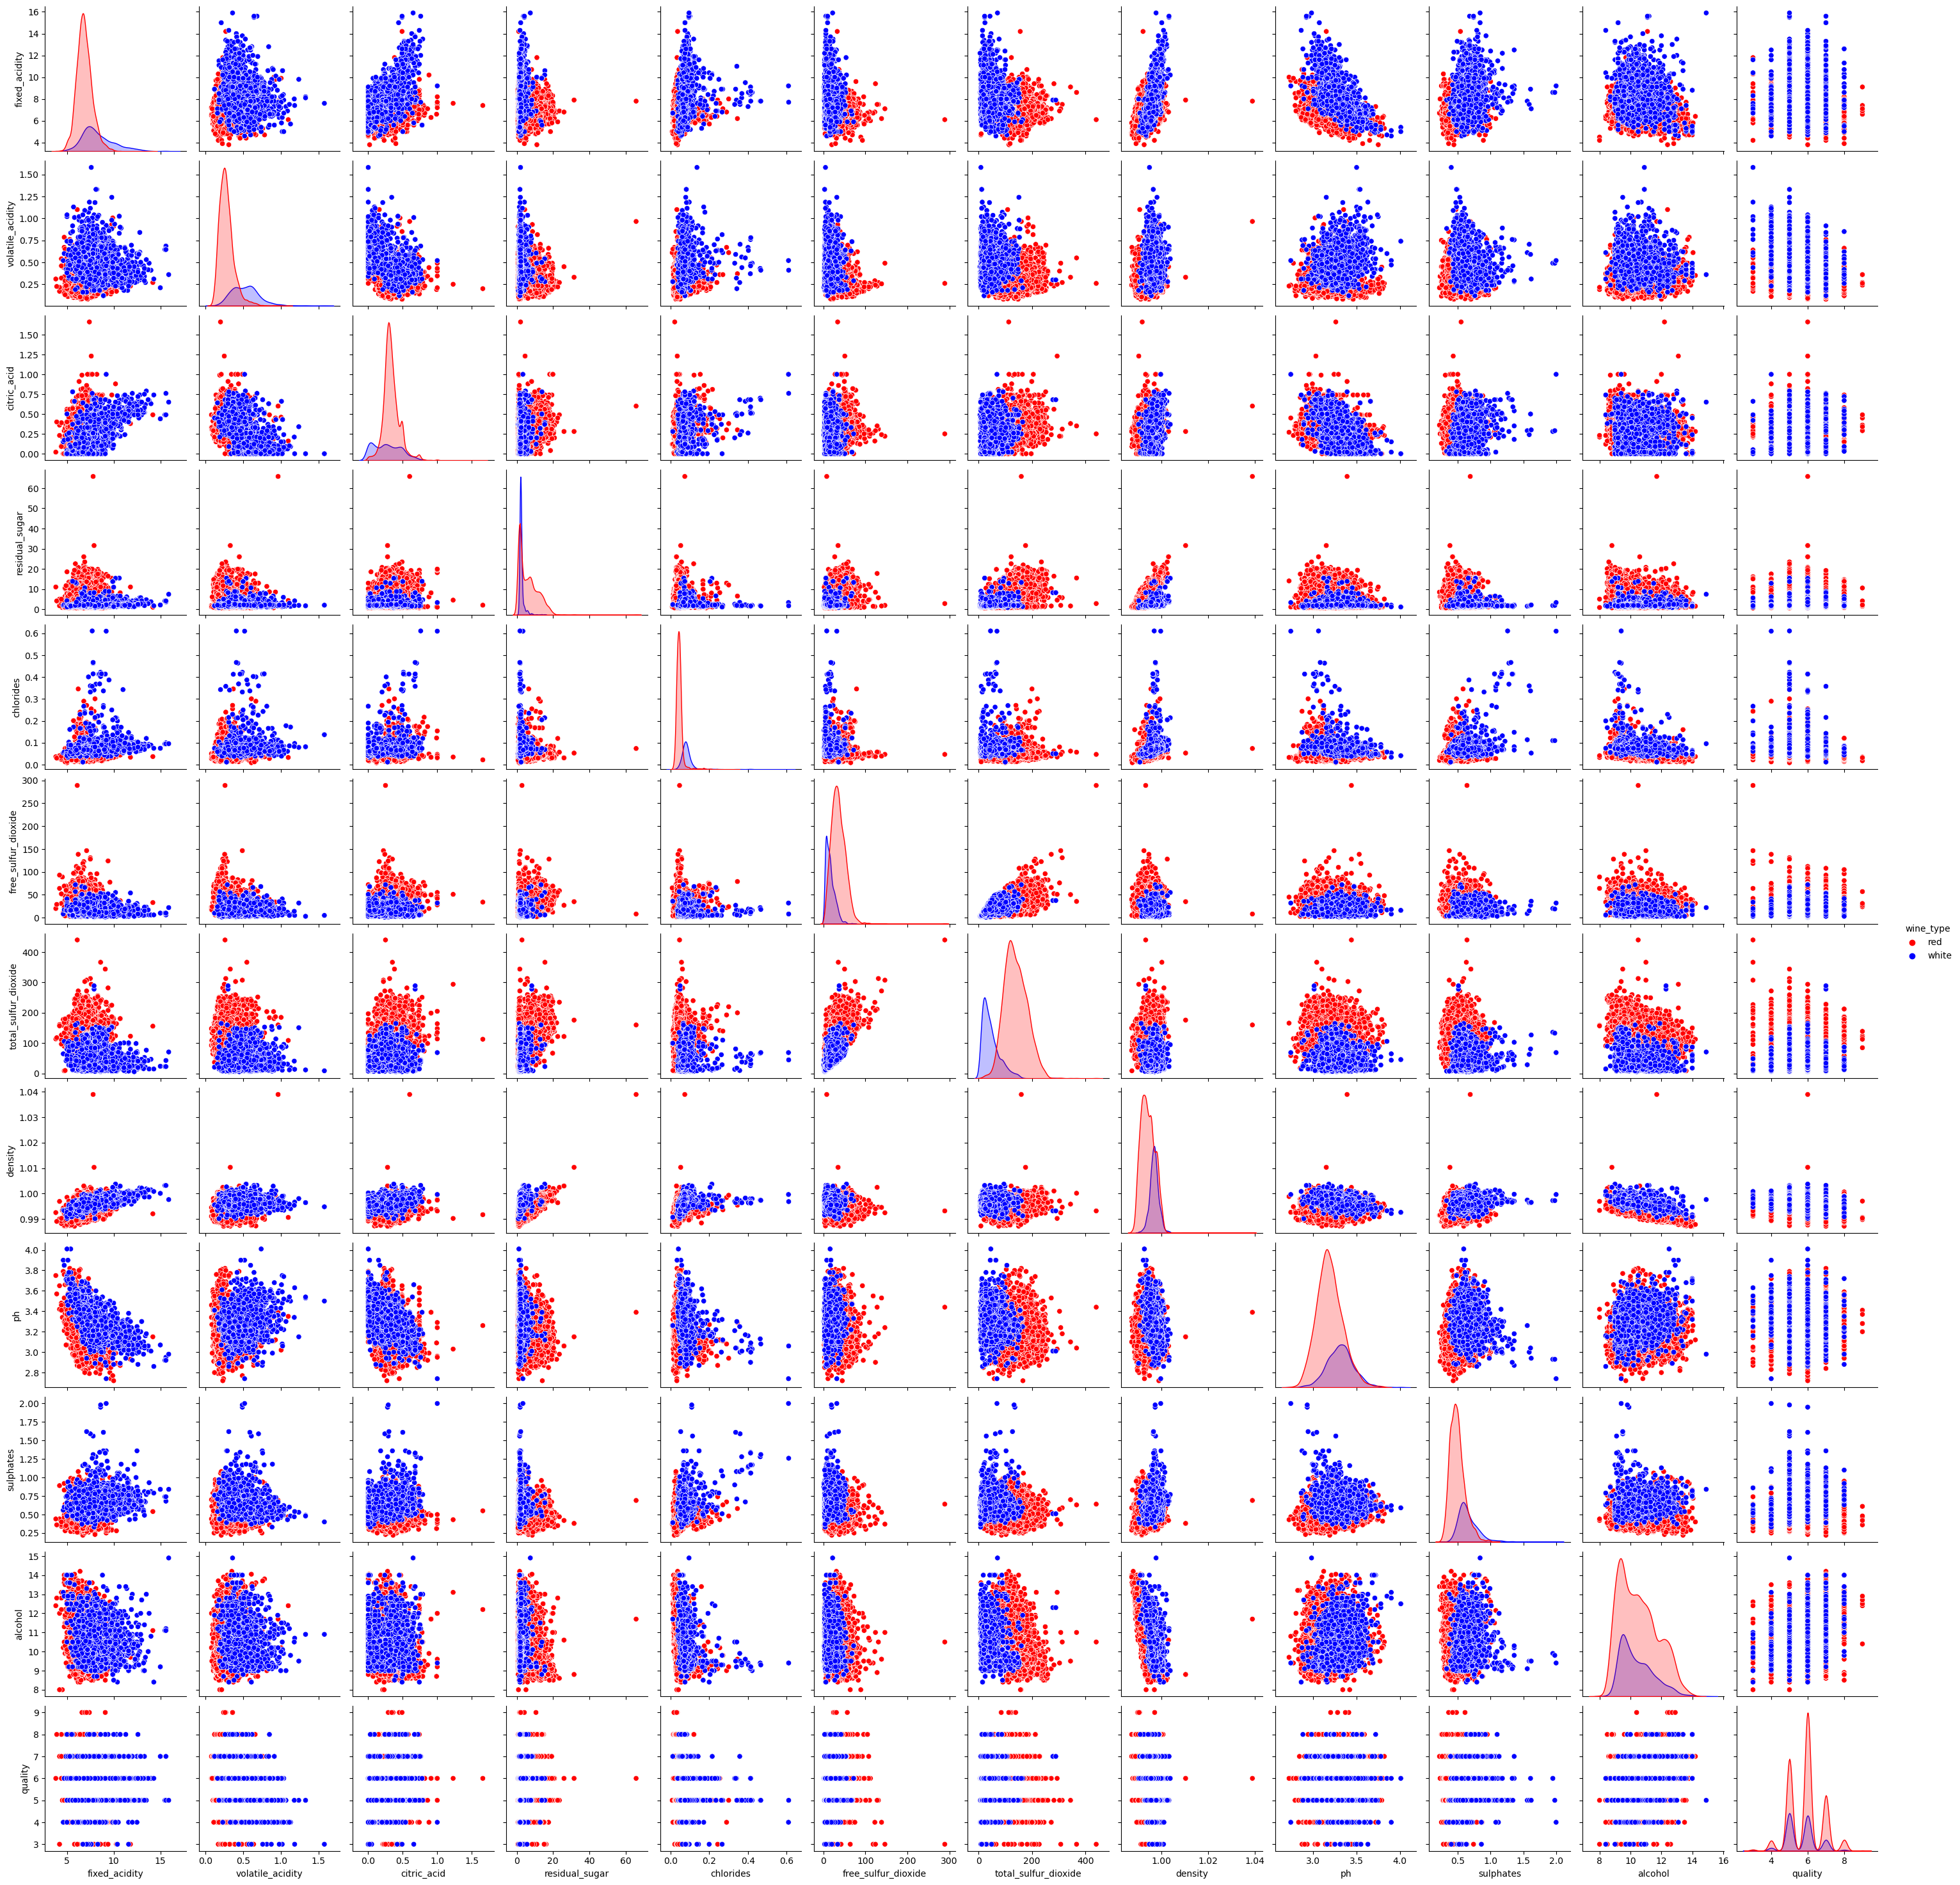

In [8]:
# Create a custom palette with 'Red' set to red and 'White' set to another color
custom_palette = {'red': 'red', 'white': 'blue'} 

# Create a pairplot with the custom palette
sns.pairplot(df, hue='wine_type', palette=custom_palette)

# Display the pairplot
plt.show()


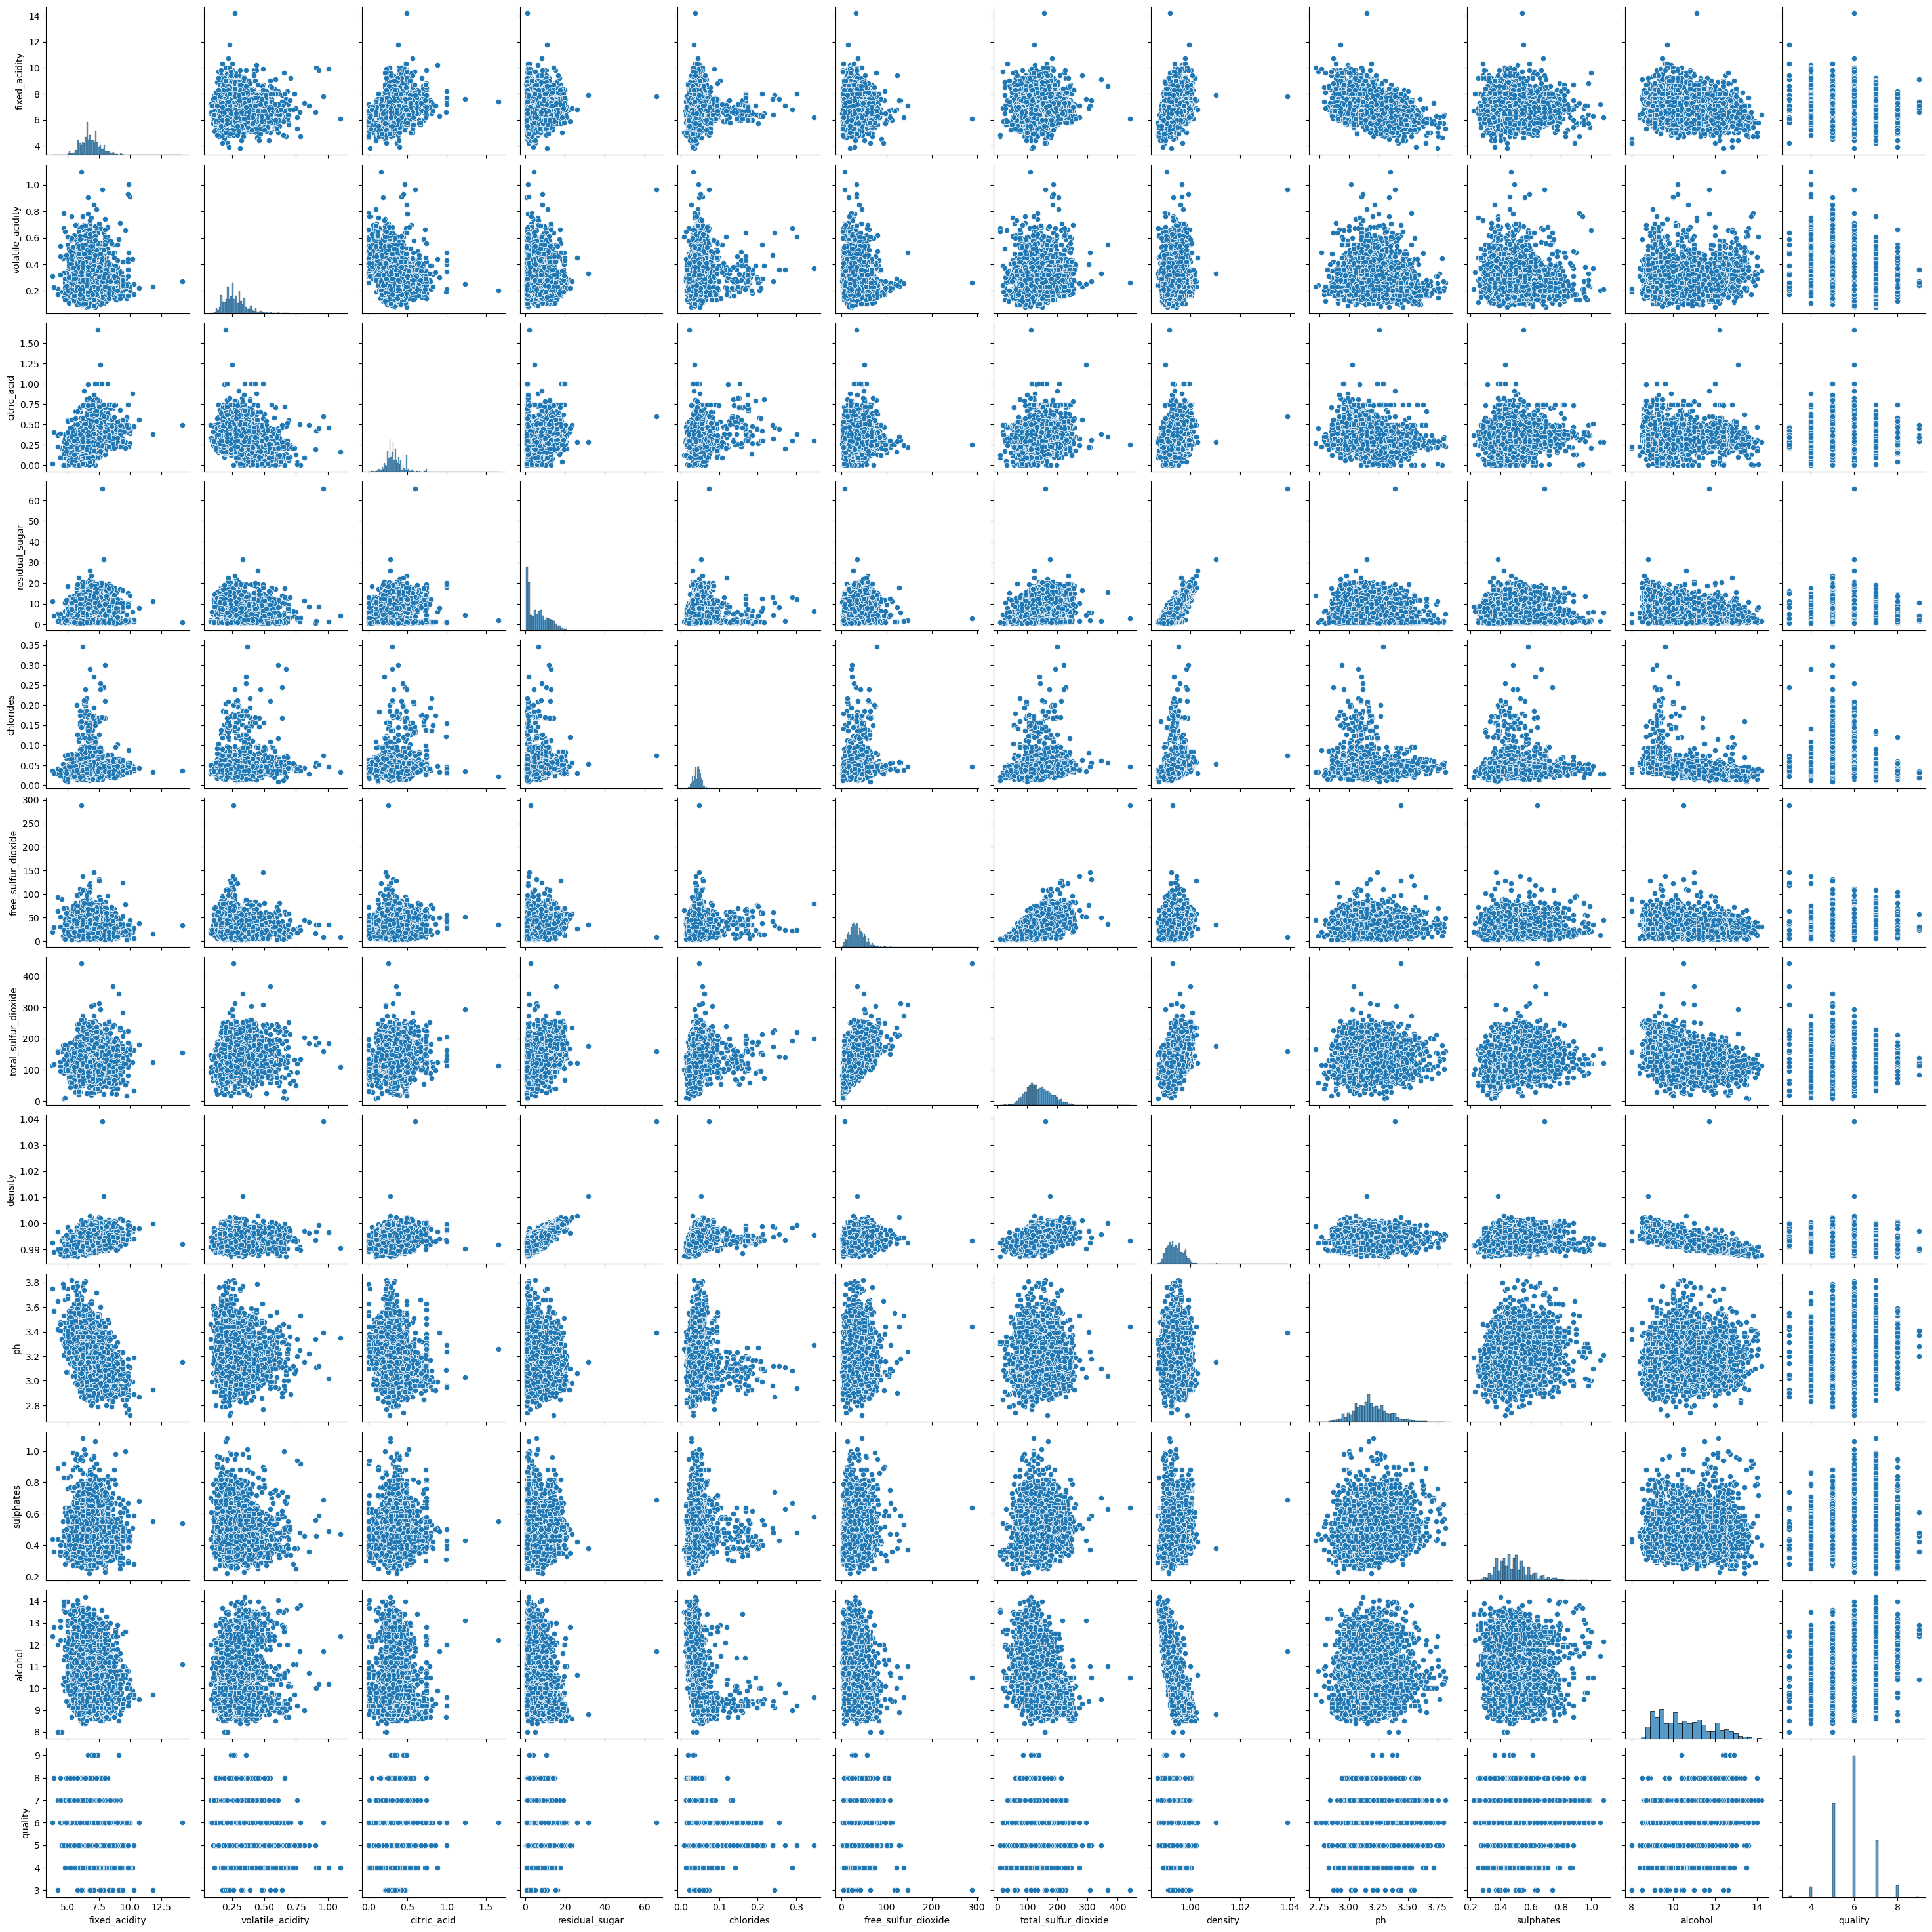

In [9]:
# Filter the DataFrame to include only rows where 'wine_type' is 'Red'
red_wine_df = df[df['wine_type'] == 'red']

# Create a pairplot for the filtered DataFrame
sns.pairplot(red_wine_df)

# Display the pairplot
plt.show()
    
        

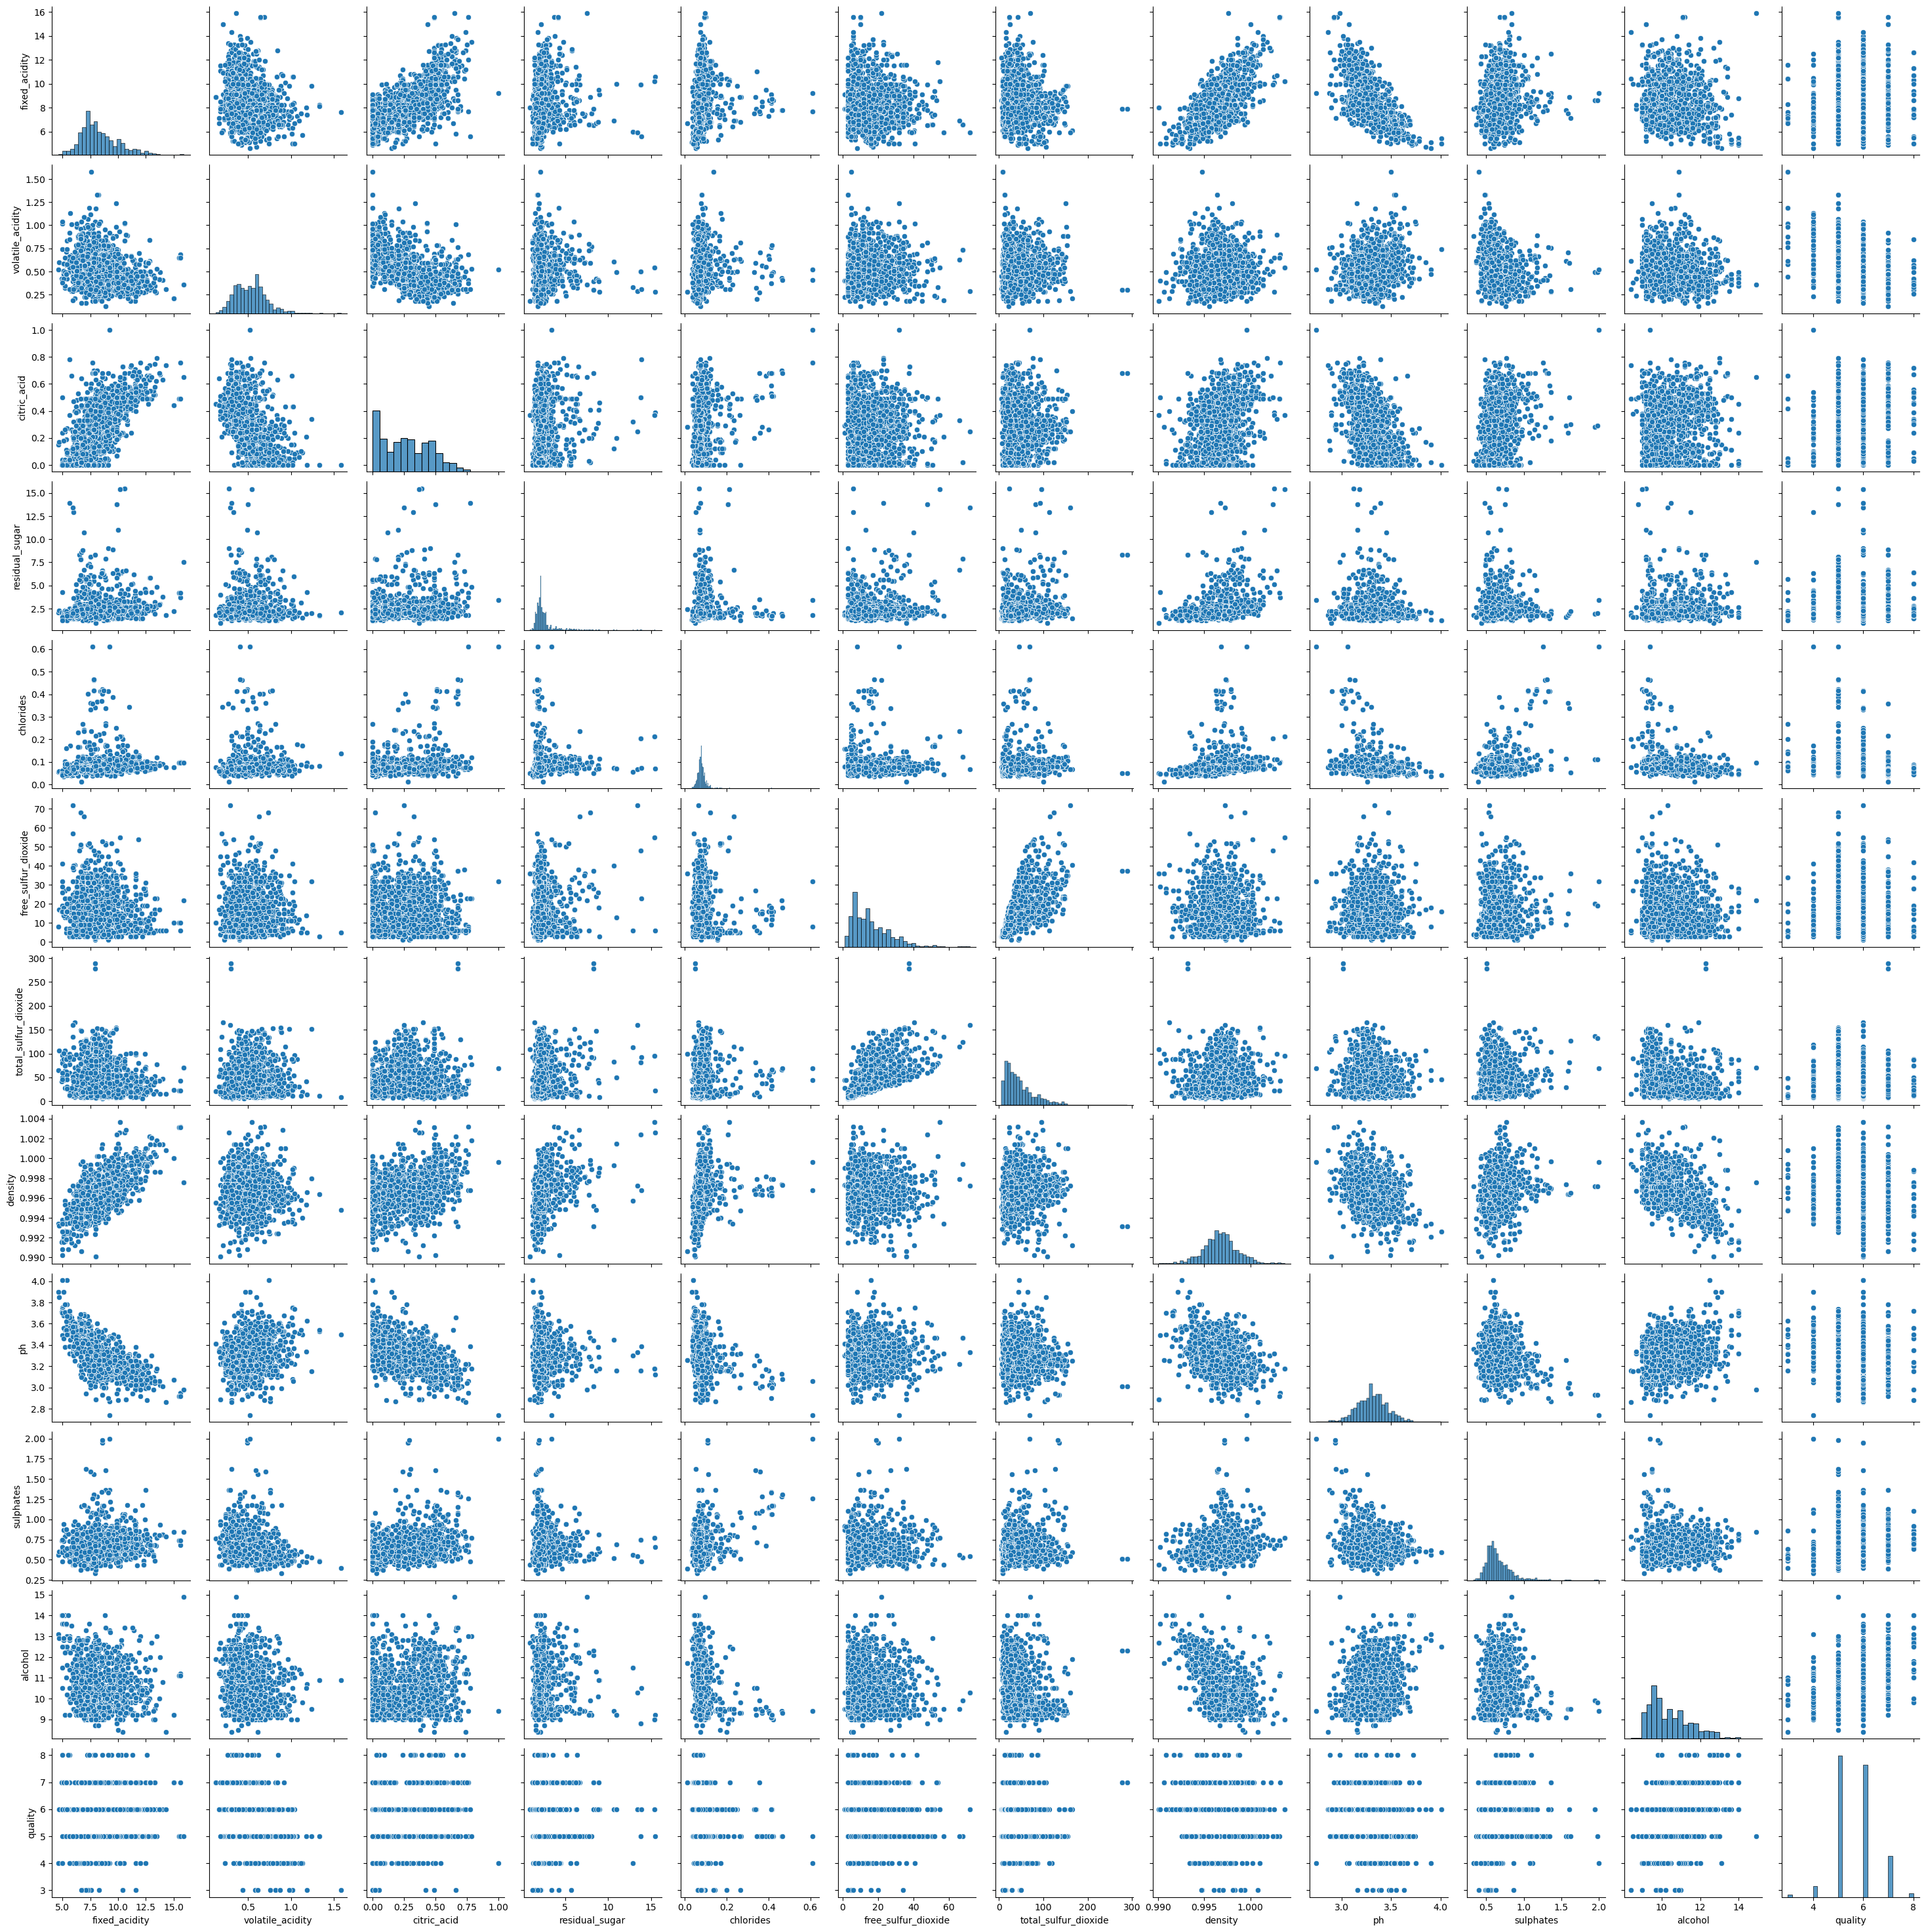

In [10]:
# Filter the DataFrame to include only rows where 'wine_type' is 'Red'
red_wine_df = df[df['wine_type'] == 'white']

# Create a pairplot for the filtered DataFrame
sns.pairplot(red_wine_df)

# Display the pairplot
plt.show()
    
        

### Take aways:

There seems to be relationship between alcohol and quality of both red and white

There seem to be a relationship between chlorides and quality of both red and white

# Hypothesis Formulation

## Hypothesis 1

Alcohol in red wine has a correlation with quality

Null: Alcohol in red wine does not have correlation with quality

Alternative: Alcholin red wine does have correlation with quality

In [11]:
# we will use pearson R test
import scipy.stats as stats

# Assuming 'red_wine_df' is your DataFrame with 'alcohol' and 'quality' columns for red wine data
alcohol_red = red_df['alcohol']
quality_red = red_df['quality']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(alcohol_red, quality_red)

# Print the correlation coefficient and p-value
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:  # Adjust the significance level as needed
    print("There is a statistically significant correlation between alcohol and quality for red wine.")
else:
    print("There is no statistically significant correlation between alcohol and quality for red wine.")


Pearson Correlation Coefficient: 0.4355747154616722
P-value: 5.6147702493406414e-226
There is a statistically significant correlation between alcohol and quality for red wine.


## Hypothesis 2

Alcohol in white wine has correlation with quality

Null: Alcohol in white wine does not have correlation with quality

Alternative: Alcohol in white winedoes have correlation with quality

In [12]:

alcohol_white = white_df['alcohol']
quality_white = white_df['quality']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(alcohol_white, quality_white)

# Print the correlation coefficient and p-value
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:  # Adjust the significance level as needed
    print("There is a statistically significant correlation between alcohol and quality for white wine.")
else:
    print("There is no statistically significant correlation between alcohol and quality for white wine.")


Pearson Correlation Coefficient: 0.47616632399953907
P-value: 2.831476979234103e-91
There is a statistically significant correlation between alcohol and quality for white wine.


## Hypothesis 3

Chlorides in red wine has correlation with quality

Null: Chlorides in red wine does not have correlation with quality

Alternative: Chlorides in red wine does not have correlation with quality

In [13]:
chlorides_red = red_df['chlorides']
quality_red = red_df['quality']

# calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(chlorides_red, quality_red)

#print the correlation coefficientand p-value
print("PearsonR Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

#interpret result
if p_value < 0.05:
    print("There is a statistically significant correlation between chlorides and quality for red wine")
else:
    print("There is no statistically significant correlation between chlorides and quality for red wine")

PearsonR Correlation Coefficient: -0.2099344109467681
P-value: 6.506541750086336e-50
There is a statistically significant correlation between chlorides and quality for red wine


## Hypothesis 4

In [14]:
chlorides_white = white_df['chlorides']
quality_white = white_df['quality']

# calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(chlorides_white, quality_white)

#print the correlation coefficientand p-value
print("PearsonR Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

#interpret result
if p_value < 0.05:
    print("There is a statistically significant correlation between chlorides and quality for white wine")
else:
    print("There is no statistically significant correlation between chlorides and quality for white wine")

PearsonR Correlation Coefficient: -0.12890655993005226
P-value: 2.3133826540602266e-07
There is a statistically significant correlation between chlorides and quality for white wine


## this will the Outerlier fencing and report. Will not need for MVP

#defining outliers by creating fences
def get_fences(df, col, k=1.5) -> (float, float):
    '''
    get fences will calculate the upper and lower fence
    based on the inner quartile range of a single Series
    
    return: lower_bound and upper_bound, two floats
    '''
    # df.describe['.75']
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    upper_bound = q3 + (k * iqr)
    lower_bound = q1 - (k * iqr)
    return lower_bound, upper_bound
upper_bound
lower_bound

## Addressing outliers by report. Will not need for MVP

num_df = df.select_dtypes('number')
for col in num_df:
    if len(num_df[col].value_counts()) > 20:
        lower_bound, upper_bound = get_fences(df,col, k=k)
        print(f'Outliers for Col {col}:')
        print('lower: ', lower_bound, 'upper: ', upper_bound)
        print(df[col][(
            df[col] > upper_bound) | (df[col] < lower_bound)])
        print('----------')
        
        


1. fixed_acidity: 357 outliers detected.
2. volatile_acidity: 377 outliers detected.
3. citric_acid: 509 outliers detected.
4. residual_sugar: 118 outliers detected.
5. chlorides: 286 outliers detected.
6. free_sulfur_dioxide: 62 outliers detected.
7. total_sulfur_dioxide: 10 outliers detected.
8. density: 3 outliers detected.
9. pH: 73 outliers detected.
10. sulphates: 191 outliers detected.
11. alcohol: 3 outliers detected.

note that there are no outliers in quality. why?
3 options are :

Removing outliers if they are data entry errors or anomalies that do not represent valid data. Transforming the data using techniques like winsorization to bring extreme values closer to the range of typical values. Treating outliers separately if they have a valid explanation or significance in your analysis.

In [15]:
df = pd.get_dummies(df, columns=['wine_type'])


## Splitting Data

In [16]:
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  wine_type_red  wine_type_white  
0         8.8        6              1                0  
1         9.5        6              1                0  
2        10.1        6              1                0  
3         9.9        6              1                0  
4         9.9        6              1                0  
...       ...      ...            ...              ...  
6492     10.5        5              0                1  
6493     11.2        6              0                1  
6494     11.0        6              0                1  
6495     10.2        5              0                1  
6496     11.0        6              0                1  

[6497 rows x 14 columns]

In [17]:

train_proportion = 0.7
val_proportion = 0.15
test_proportion = 0.15

# Calculate the number of samples for each set
total_samples = len(df)
train_samples = int(train_proportion * total_samples)
val_samples = int(val_proportion * total_samples)
test_samples = int(test_proportion * total_samples)

# Split the dataset
train_data = df[:train_samples]
val_data = df[train_samples:train_samples + val_samples]
test_data = df[train_samples + val_samples:]

# Check the shapes
train_shape = train_data.shape
val_shape = val_data.shape
test_shape = test_data.shape

print("Train shape:", train_shape)
print("Validation shape:", val_shape)
print("Test shape:", test_shape)



Train shape: (4547, 14)
Validation shape: (974, 14)
Test shape: (976, 14)


In [18]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)
X_val_scaled = scaler.fit_transform(val_data)
X_test_scaled = scaler.fit_transform(test_data)

In [19]:
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  wine_type_red  wine_type_white  
0         8.8        6              1                0  
1         9.5        6              1                0  
2        10.1        6              1                0  
3         9.9        6              1                0  
4         9.9        6              1                0  
...       ...      ...            ...              ...  
6492     10.5        5              0                1  
6493     11.2        6              0                1  
6494     11.0        6              0                1  
6495     10.2        5              0                1  
6496     11.0        6              0                1  

[6497 rows x 14 columns]

In [20]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

## Modeling

In [24]:
# Using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def linear_regression(df, target_column='quality', test_size=0.2, random_state=None):
    # Split the data into features (X) and the target variable (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create and fit a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Return the model, predictions, and evaluation metrics
    return {
        'model': model,
        'predictions': y_pred,
        'mean_squared_error': mse,
        'r2_score': r2
    }


result = linear_regression(df)
print("Mean Squared Error:", result['mean_squared_error'])
print("R-squared:", result['r2_score'])


Mean Squared Error: 0.5280819293814316
R-squared: 0.2857795403690435


with a MSE this low, i can say that thepredictions are closer to actual values

with the R-squared value , the model does not capture all of the data

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming you have your DataFrame 'df' with 'quality' as the target variable
# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['quality'])
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_actual = y_test  # Actual values from the test set
y_predicted = model.predict(X_test)  # Predicted values

# Now, 'y_actual' contains the actual target values, and 'y_predicted' contains the predicted values.


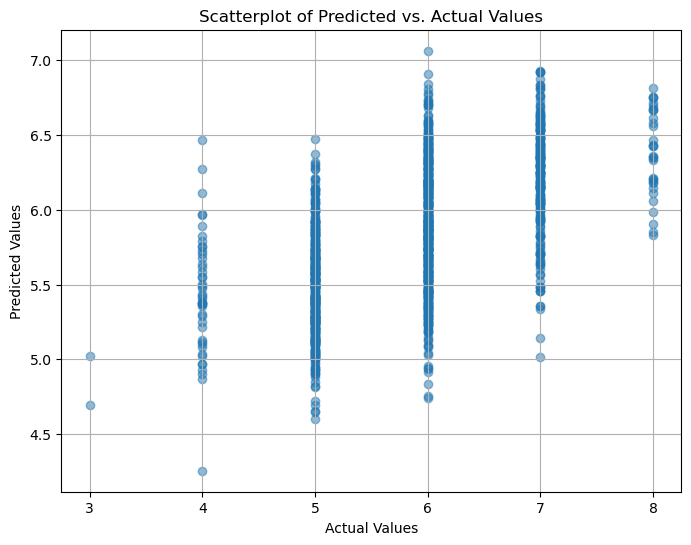

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Scatterplot of Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_predicted, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of Predicted vs. Actual Values')
plt.grid(True)
plt.show()



In [34]:
# Step 6: Conclusion (for MVP, provide a basic summary)
print("Minimum Viable Product (MVP) completed.")

Minimum Viable Product (MVP) completed.
